<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/llibre-estil/logo-UOC-masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.878 · Trabajo fin de Máster · PEC3</p>
<p style="margin: 0; text-align:right;">2023-2 · Máster universitario en Ciencia de datos</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudios de Informática, Multimedia y Telecomunicación</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Fase 2. Análisis exploratorio de datos.

Este notebook está dividido en las siguientes partes:

 1. Introduccióm
 2. Preprocesamiento
 3. Análisis exploratorio de datos
 4. Creación de dataframe de estudio
 5. Conclusiones

# 1. Introducción

En el presente notebook se desarrolla la segunda fase de la PEC 3 del trabajo de fin de máster titulado: **Técnicas de aprendizaje automático aplicadas en la predicción de potenciales compradores en un e-commerce de productos empresariales en Colombia**.
En la Sección 2, se procede con un análisis descriptivo detallado de las variables del dataset. Este análisis se realiza de manera secuencial, iniciando con las variables numéricas y seguido por las variables categóricas, empleando enfoques tanto univariados como multivariados. La Sección 3 está dedicada a la creación del dataset final, el cual será la base para el desarrollo de modelos predictivos. Finalmente, la Sección 4 recoge las conclusiones más significativas derivadas del estudio realizado en este notebook

In [35]:
import pandas as pd
import numpy as np
import etl_process as etl    
from joblib import Parallel, delayed
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
data_set = pd.read_pickle('data//data_set_1.pkl')

# 2. Análisis Exploratorio de datos

En esta sección se precederá a realizar un análisis descriptivo de los atributos del conjunto de datos. En primera instancia se realizará un estudio univariado, basado en estadística descriptiva, gráficos de barras, histogramas y diagramas de cajas. En segunda instancia se hace un estudio multivariado para identificar que relaciones entre variables. Entre las técnicas utilizadas se tienen gráficos de dispersión, correlación, análisis de componentes principales y clusterización. Finalmente se hace un estudio preliminar de importancia de características, basado en correlación con la variable a predecir (variables numéricas) e información mutua (variables categóricas).
No se comentaran las gráficas del análisis univariado, ya que esto se realizó en el notebook 1_etl_eda. 

## 2.1. Variables numéricas

In [34]:
data_set.select_dtypes(include=['int', 'float']).agg(etl.describe).T

,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
cons_descproducto_mas_freq_total,142736.0,1.650200,4.769082e-01,1.0,1.0,2.0,2.0,2.000000e+00,-0.629901,-1.603247
cons_empconsul_sector_mas_freq_total,142736.0,1.750169,1.343521e+00,1.0,1.0,1.0,2.0,2.100000e+01,3.227300,17.028817
cons_empconsul_prov_desc_mas_freq_total,142736.0,1.502453,1.110240e+00,1.0,1.0,1.0,2.0,2.800000e+01,4.646398,39.948648
cons_total_consumos,142736.0,50.186517,2.315115e+02,1.0,4.0,12.0,38.0,6.006600e+04,139.516805,33017.247518
cons_total_usuarios,142736.0,29.747563,1.367645e+02,1.0,3.0,7.0,21.0,3.739300e+04,152.310291,39484.350284
pcons_numconsumos,142736.0,12.468606,3.263513e+01,1.0,2.0,4.0,9.0,4.250000e+02,6.583821,54.879576
pcons_numusuarios,142736.0,8.047530,2.317977e+01,1.0,1.0,2.0,5.0,3.030000e+02,7.469217,68.109147
ses_dias_max_entre_sesion,142736.0,33.443455,1.281134e+02,0.0,0.0,0.0,0.0,1.480000e+03,5.277126,32.396344
ses_dias_min_entre_sesion,142736.0,26.780588,1.141215e+02,0.0,0.0,0.0,0.0,1.431000e+03,6.049596,43.123463
ses_fechas_total_sesion,142736.0,1.275460,1.030149e+00,1.0,1.0,1.0,1.0,1.290000e+02,50.729990,4733.408988


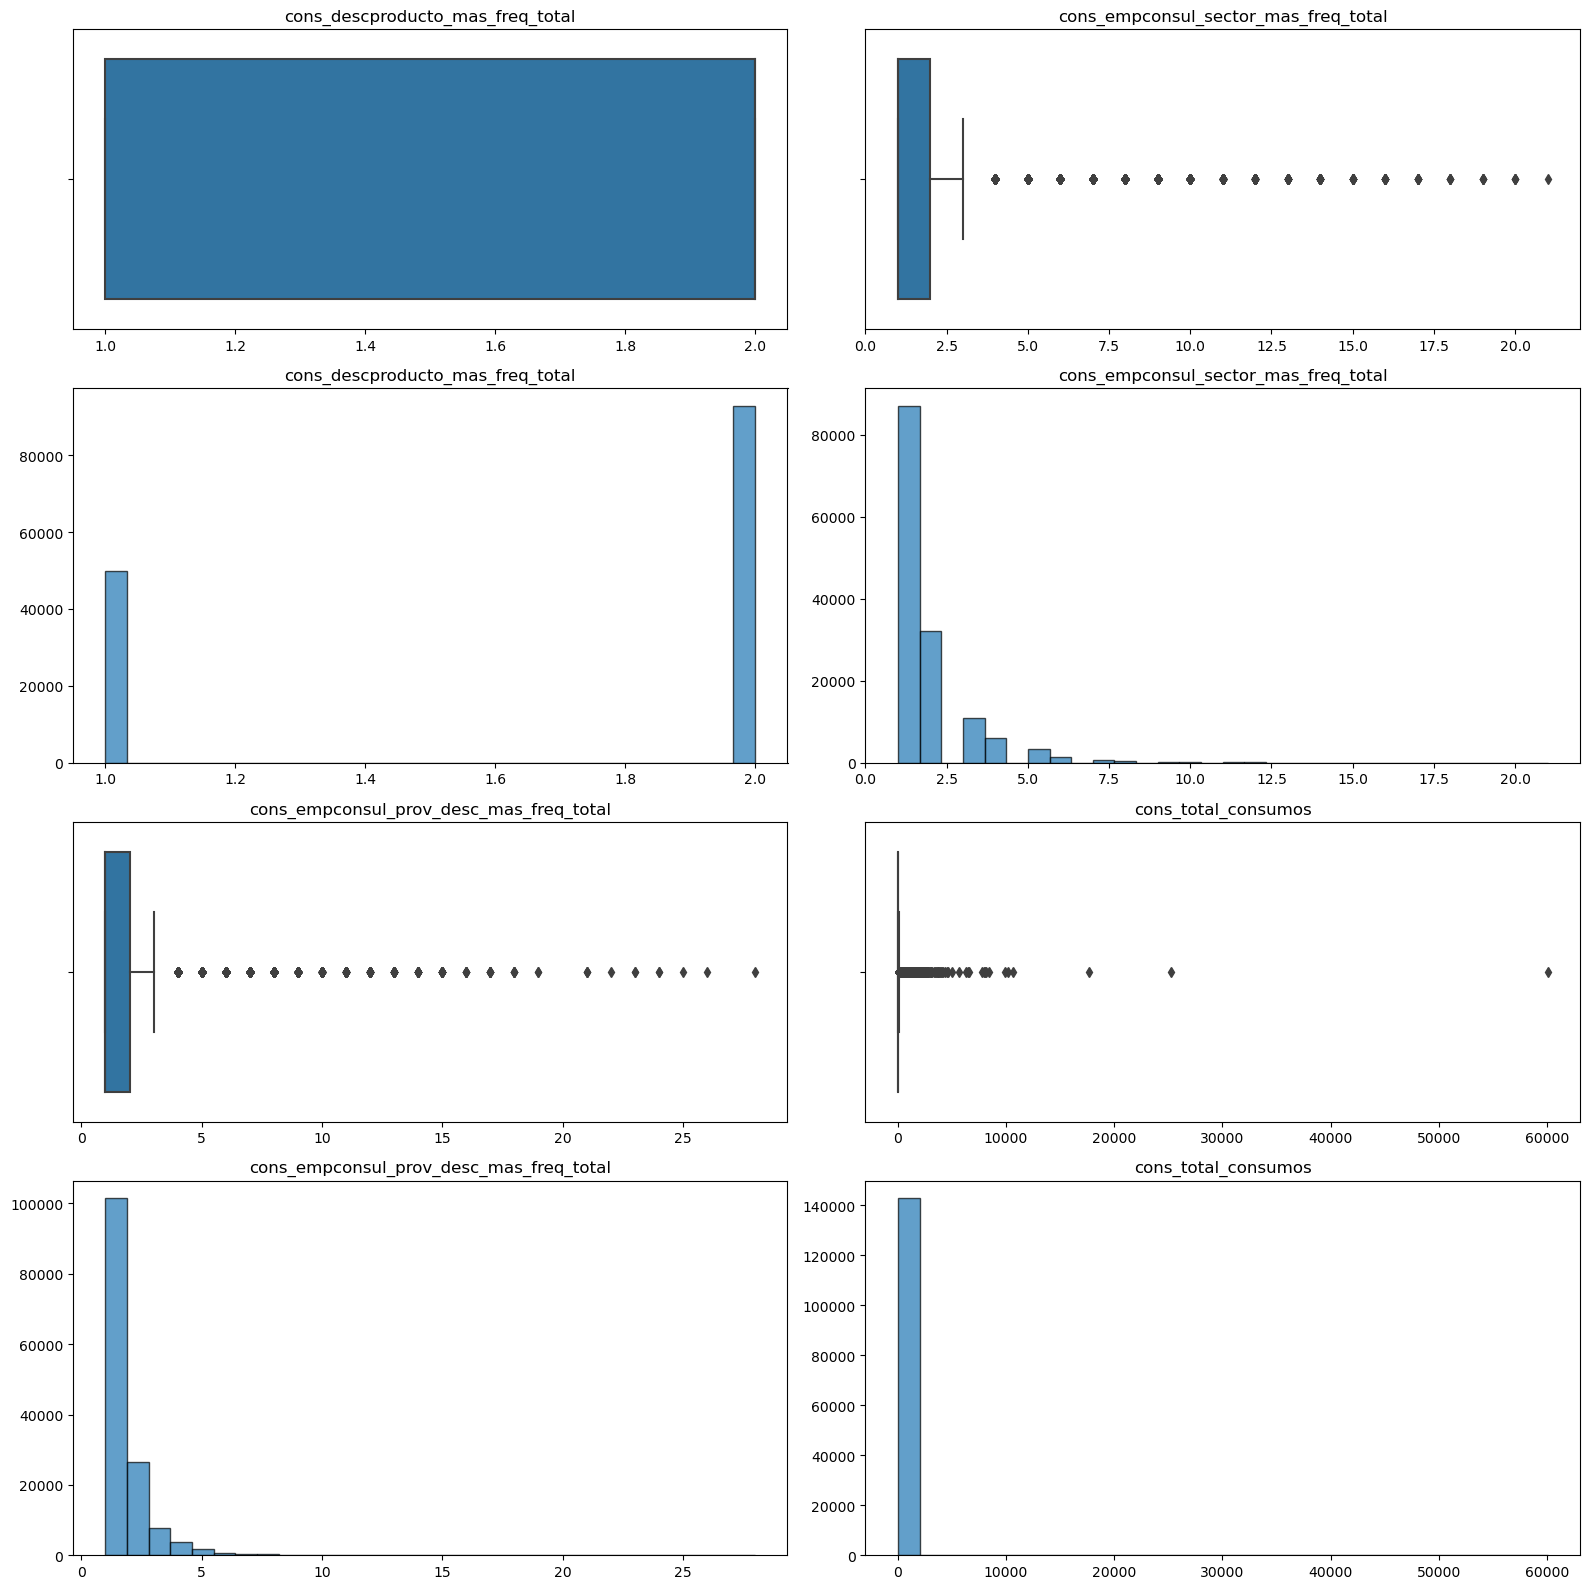

In [51]:
etl.plot_boxplot_and_hist(data_set.select_dtypes(include=['int', 'float']).iloc[:, :4])

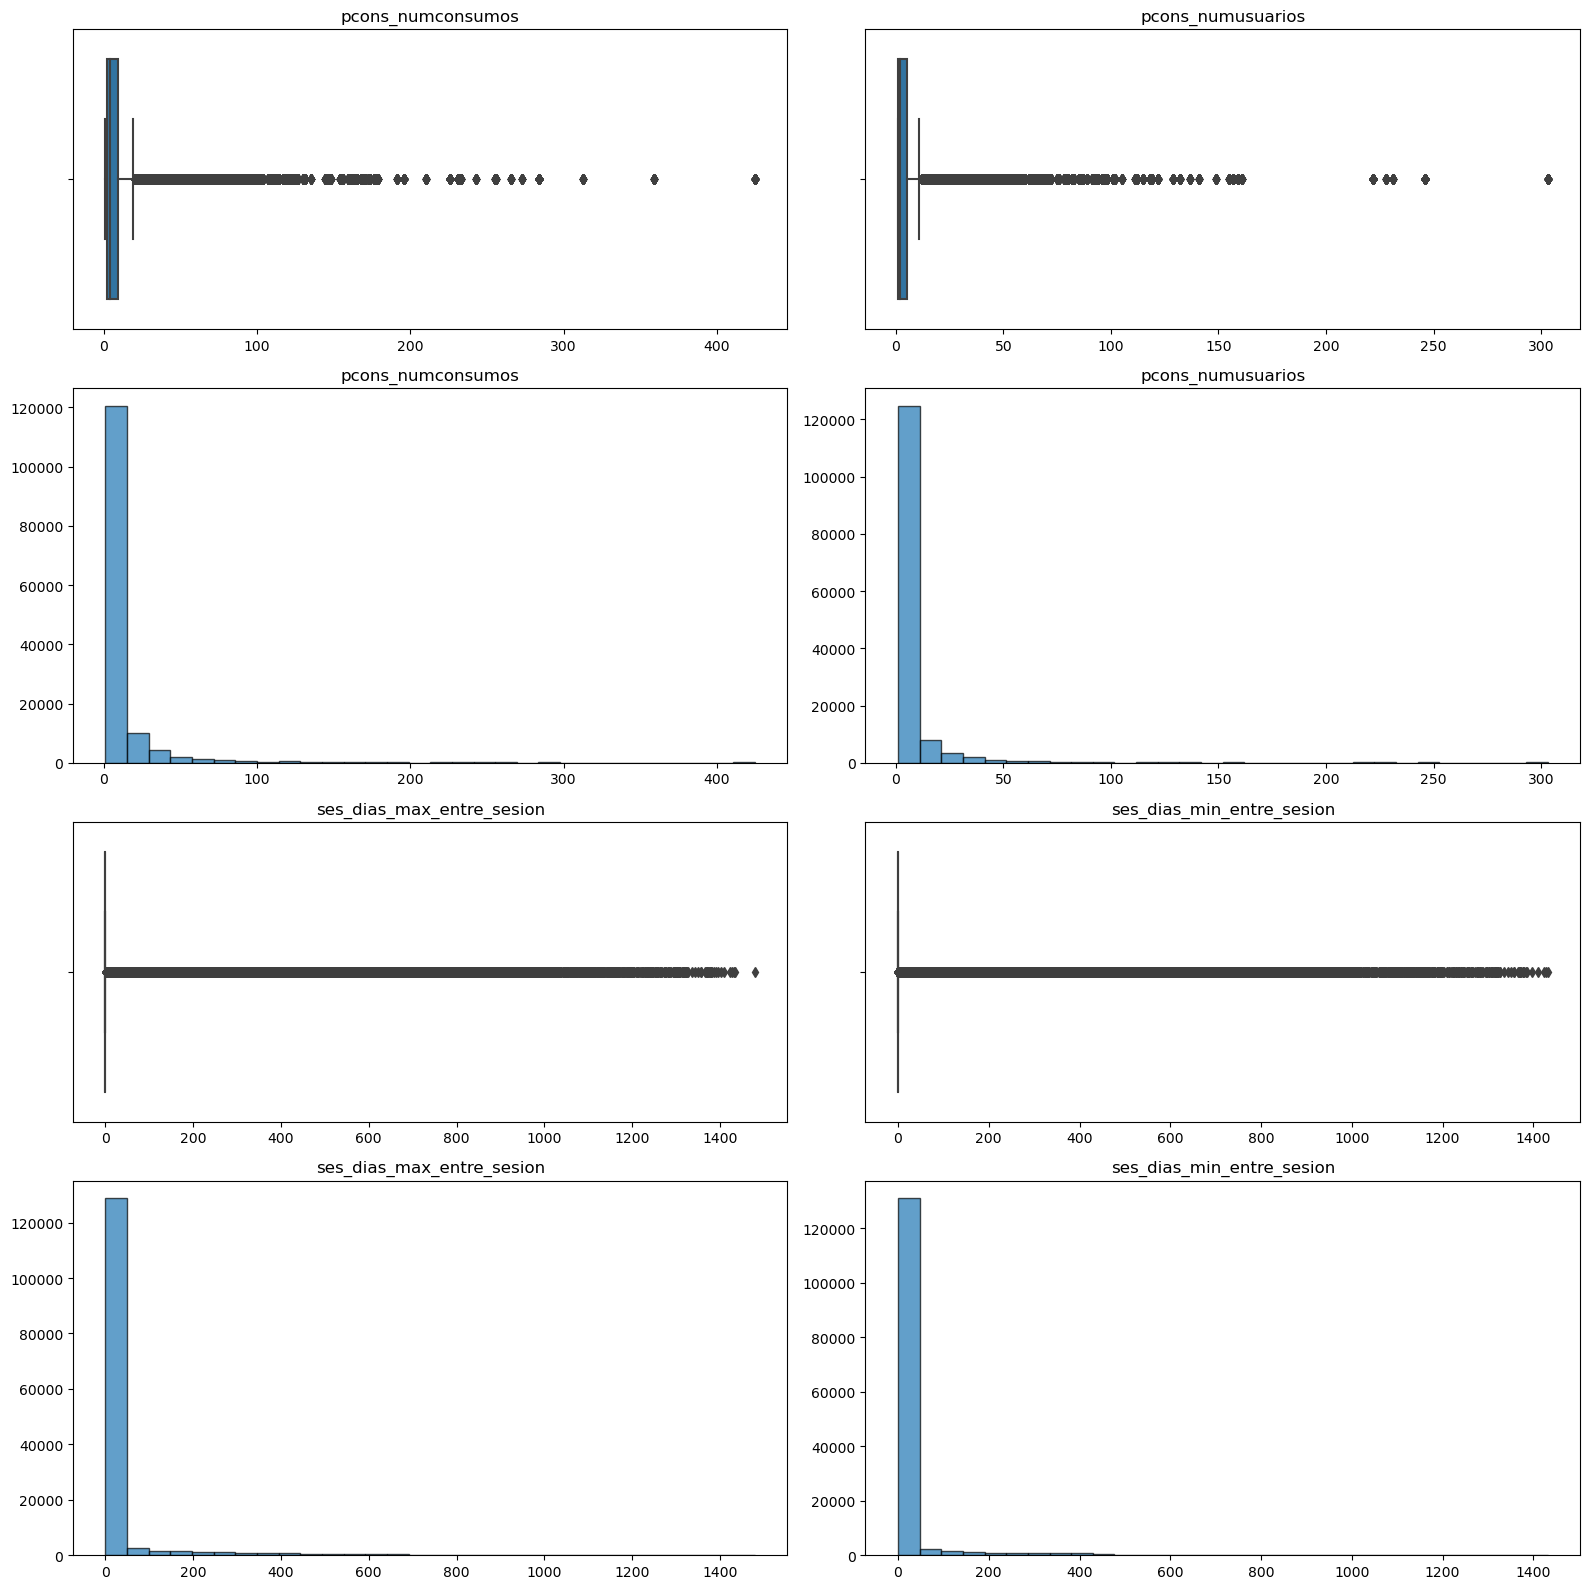

In [52]:
etl.plot_boxplot_and_hist(data_set.select_dtypes(include=['int', 'float']).iloc[:, 5:9])

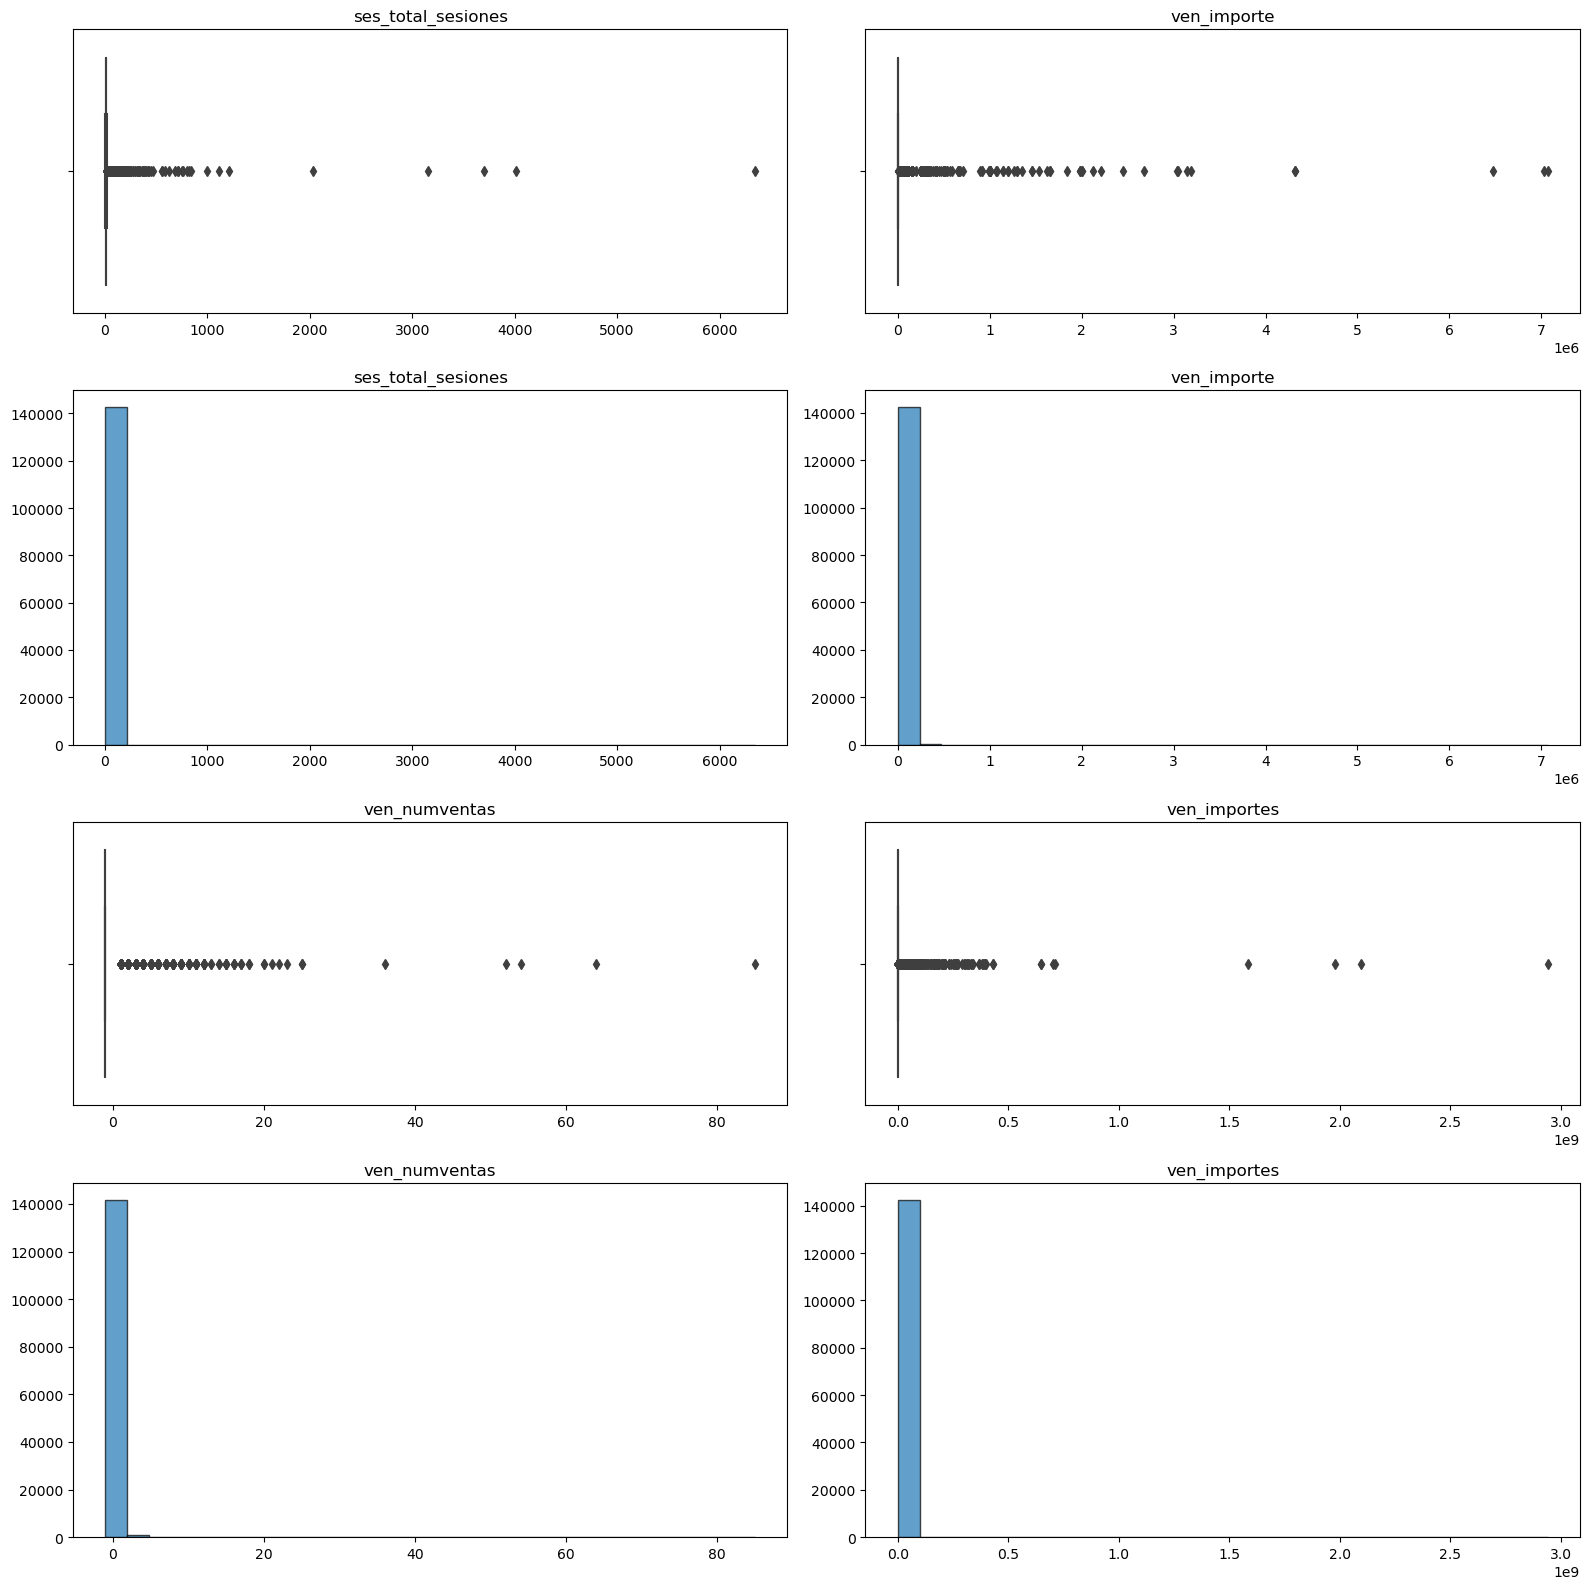

In [53]:
etl.plot_boxplot_and_hist(data_set.select_dtypes(include=['int', 'float']).iloc[:, 10:14])

## 2.2. Variables categóricas

In [54]:
data_set.select_dtypes(include=['object']).describe(include='all').fillna(0).T

,count,unique,top,freq
cons_descproducto_mas_freq,142736,2,Ficha Básica,77703
cons_empconsul_sector_mas_freq,142736,22,G,36795
cons_empconsul_prov_desc_mas_freq,142736,34,Bogota,60703
pcons_descproducto,142736,2,Perfil Promocional,103082
pcons_empconsul_sector,142736,22,G,33592
pcons_empconsul_descsector,142736,22,Comercio,33592
pcons_empconsul_prov_desc,142736,34,Bogota,57099
usu_tipousuario,142736,3,PF,102160
usu_canal_registro,142736.0,8.0,3.0,41746.0
usu_ind_cliente,142736,2,0,140121


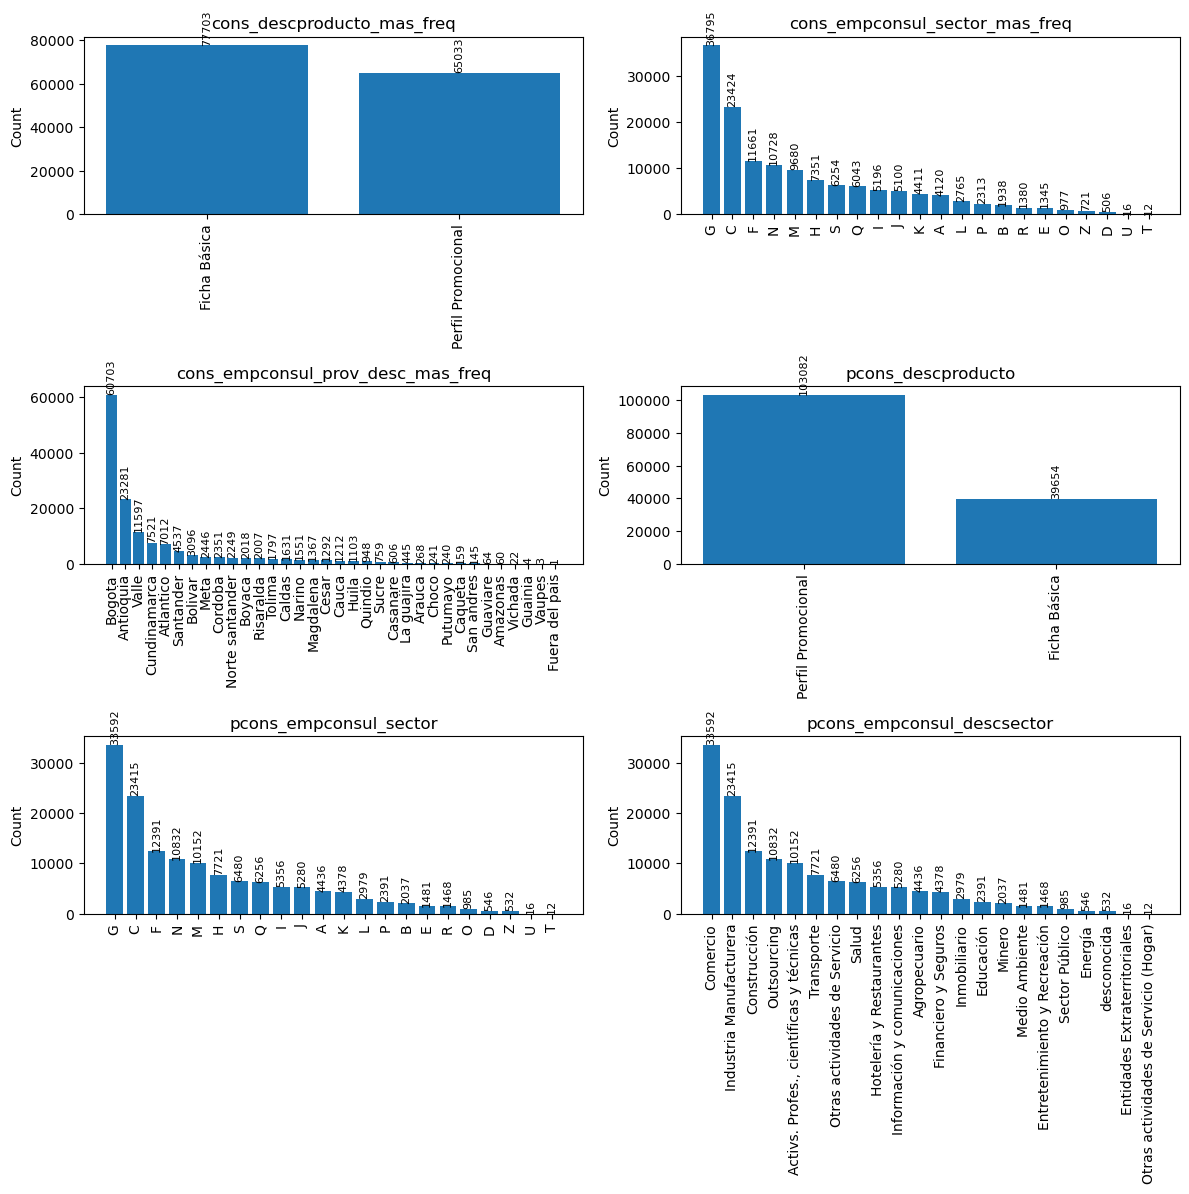

In [55]:
etl.plot_categorical_bars(data_set.select_dtypes(include=['object']).iloc[:, :6], show_counts=True)

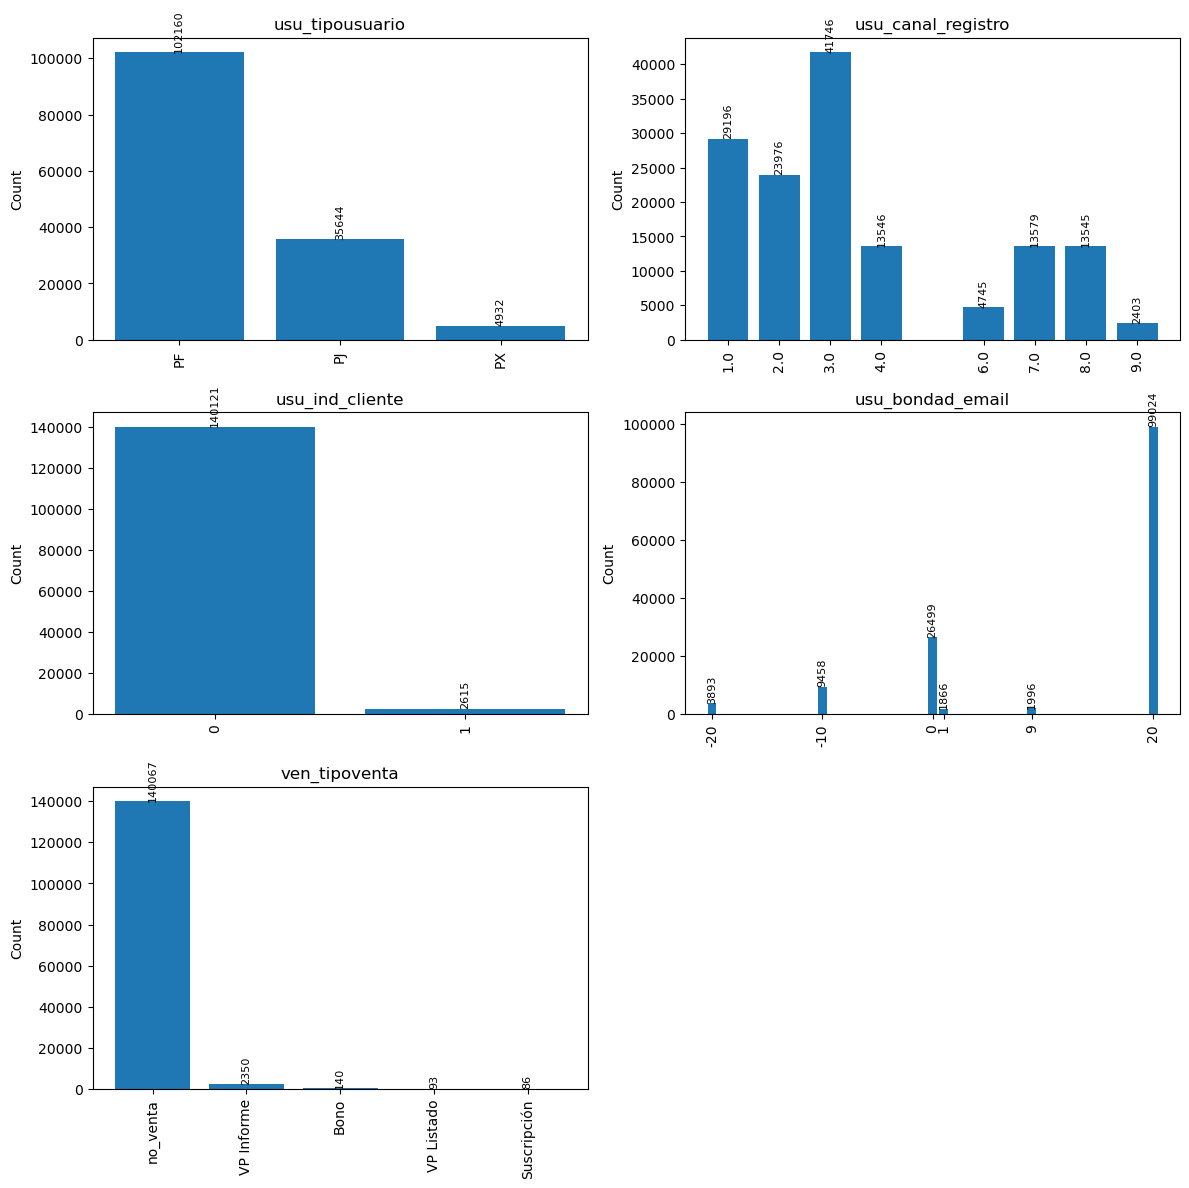

In [56]:
etl.plot_categorical_bars(data_set.select_dtypes(include=['object']).iloc[:, 7:], show_counts=True)

## 2.3. Análisis Multivariado 

En esta sección se hace un análisis gráfico considerando la interacción de todas las variables. Para ello se genera un gráfico de dispersión y se calcula la correlación entre las variables numéricas. 

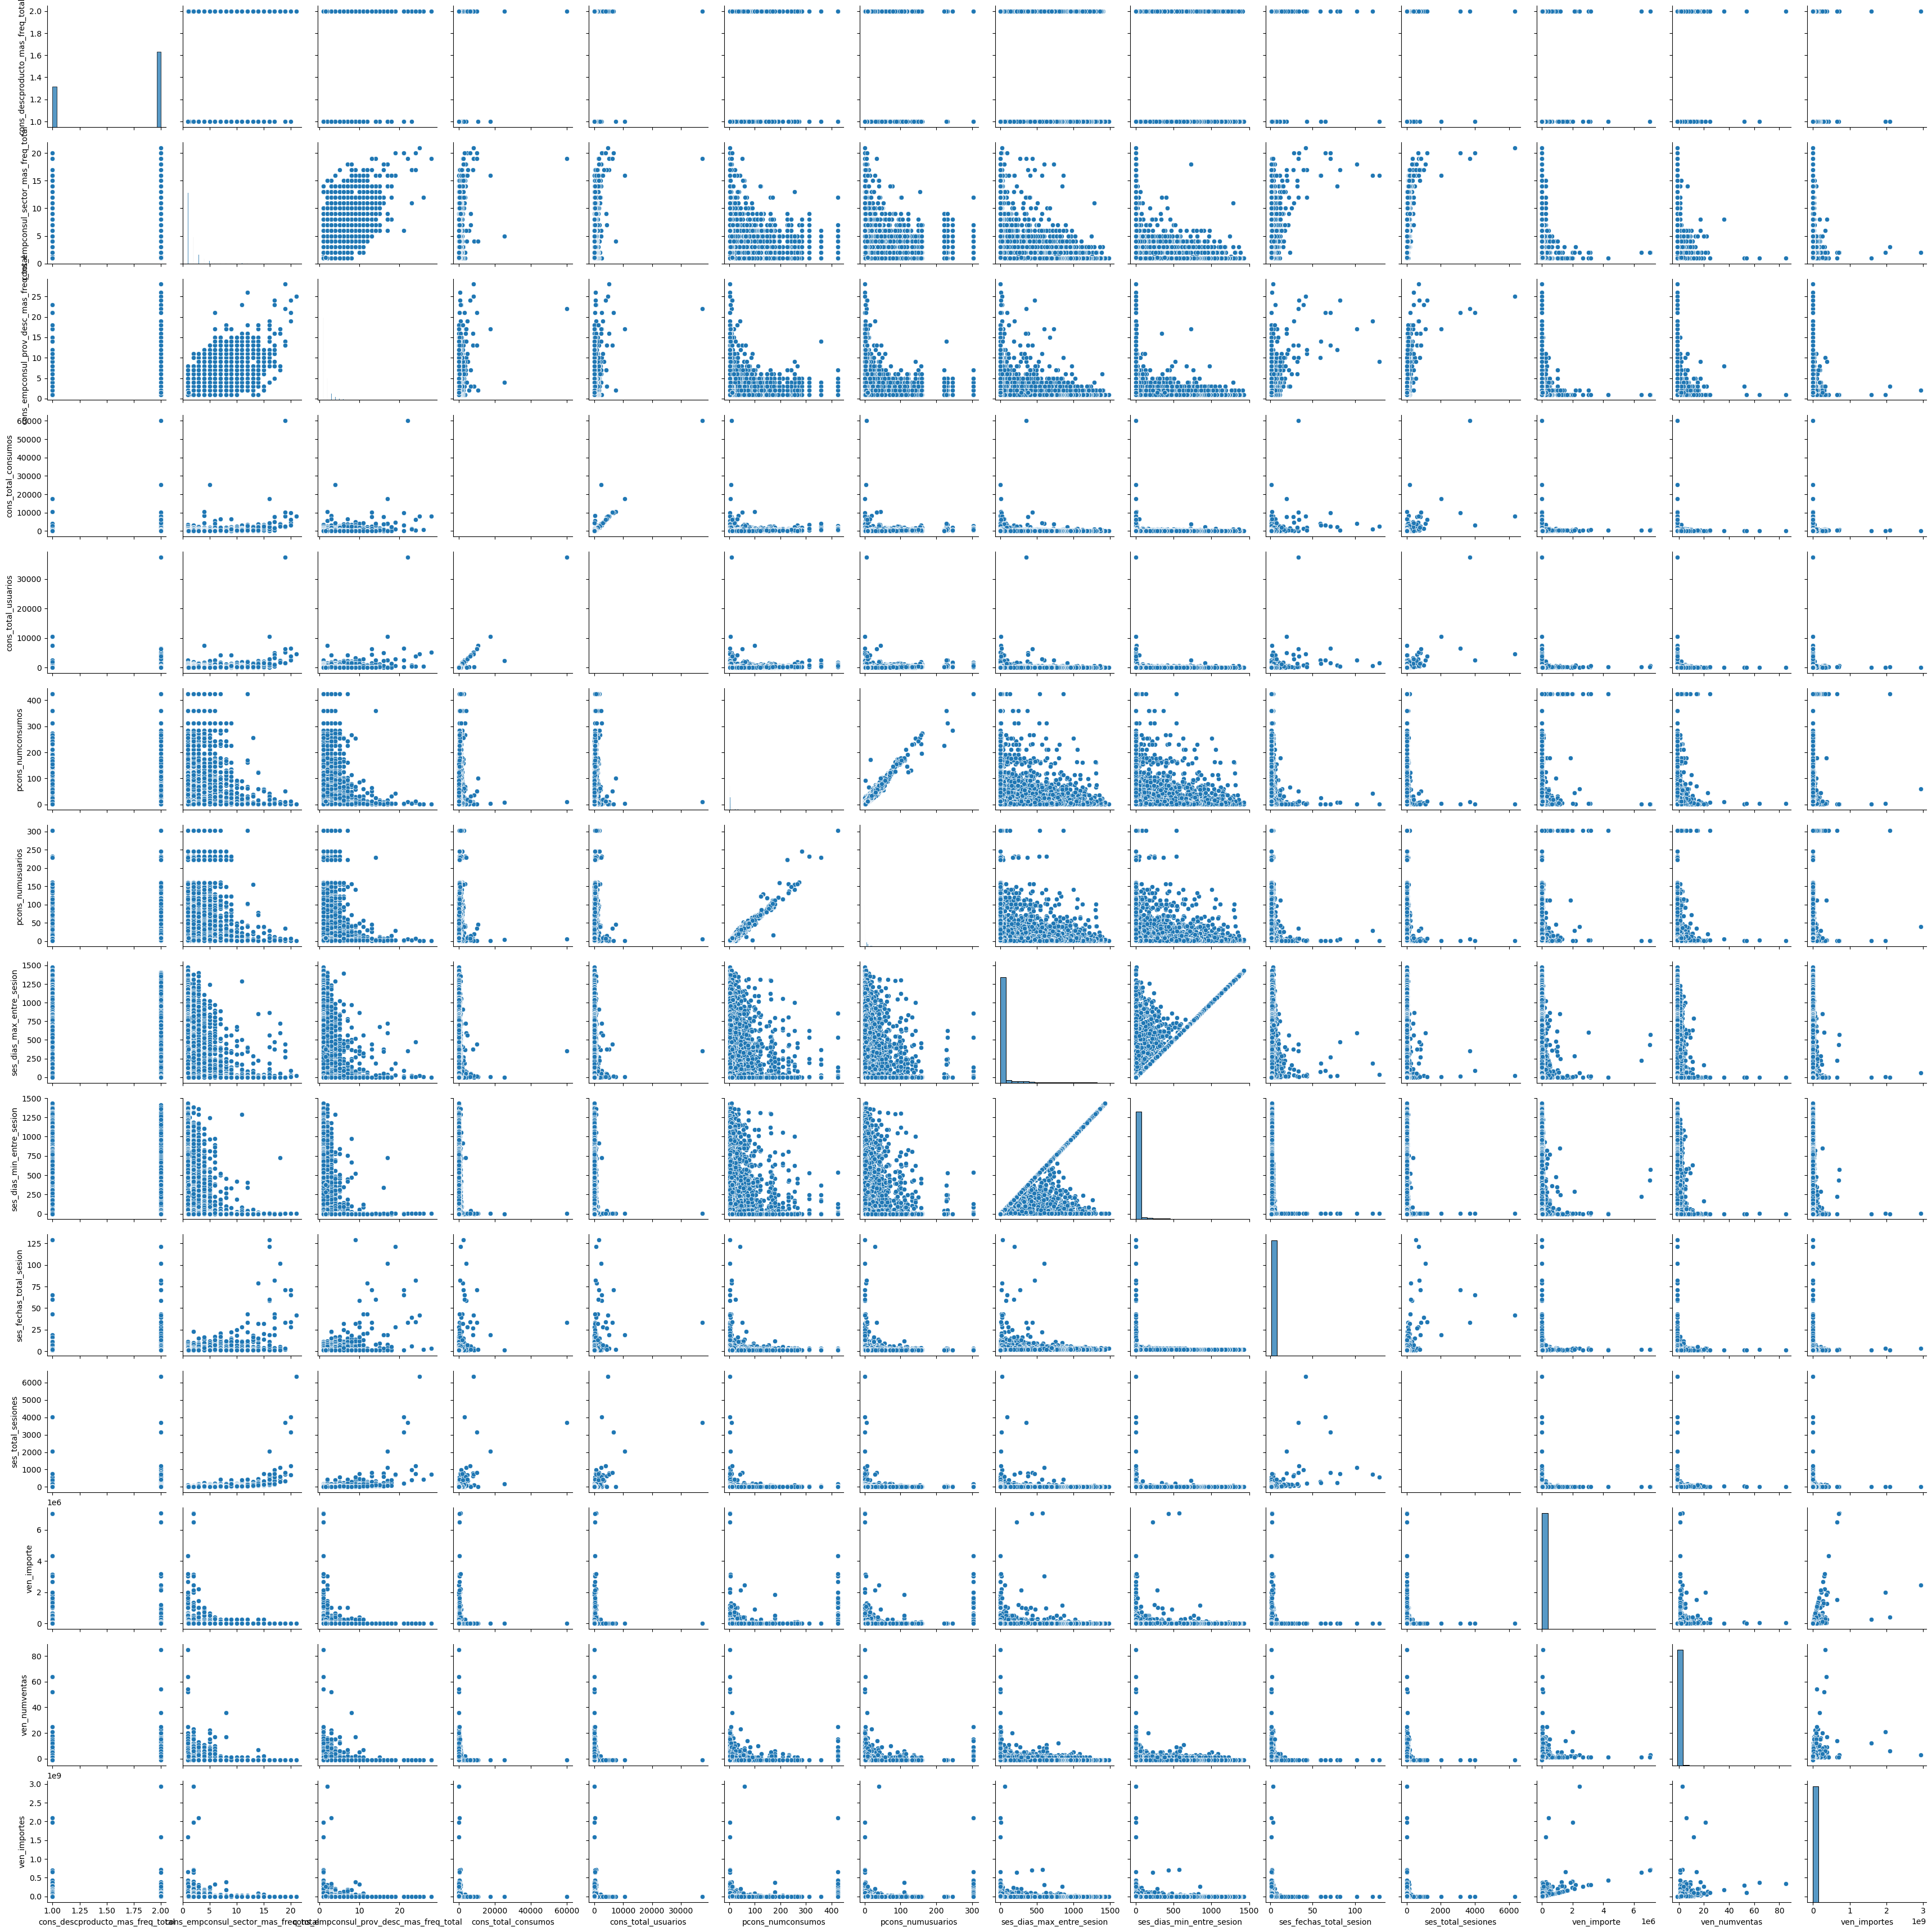

In [19]:
_ = sns.pairplot(data_set.select_dtypes(include=['int', 'float']))

### 2.3.1. Correlación variables numéricas

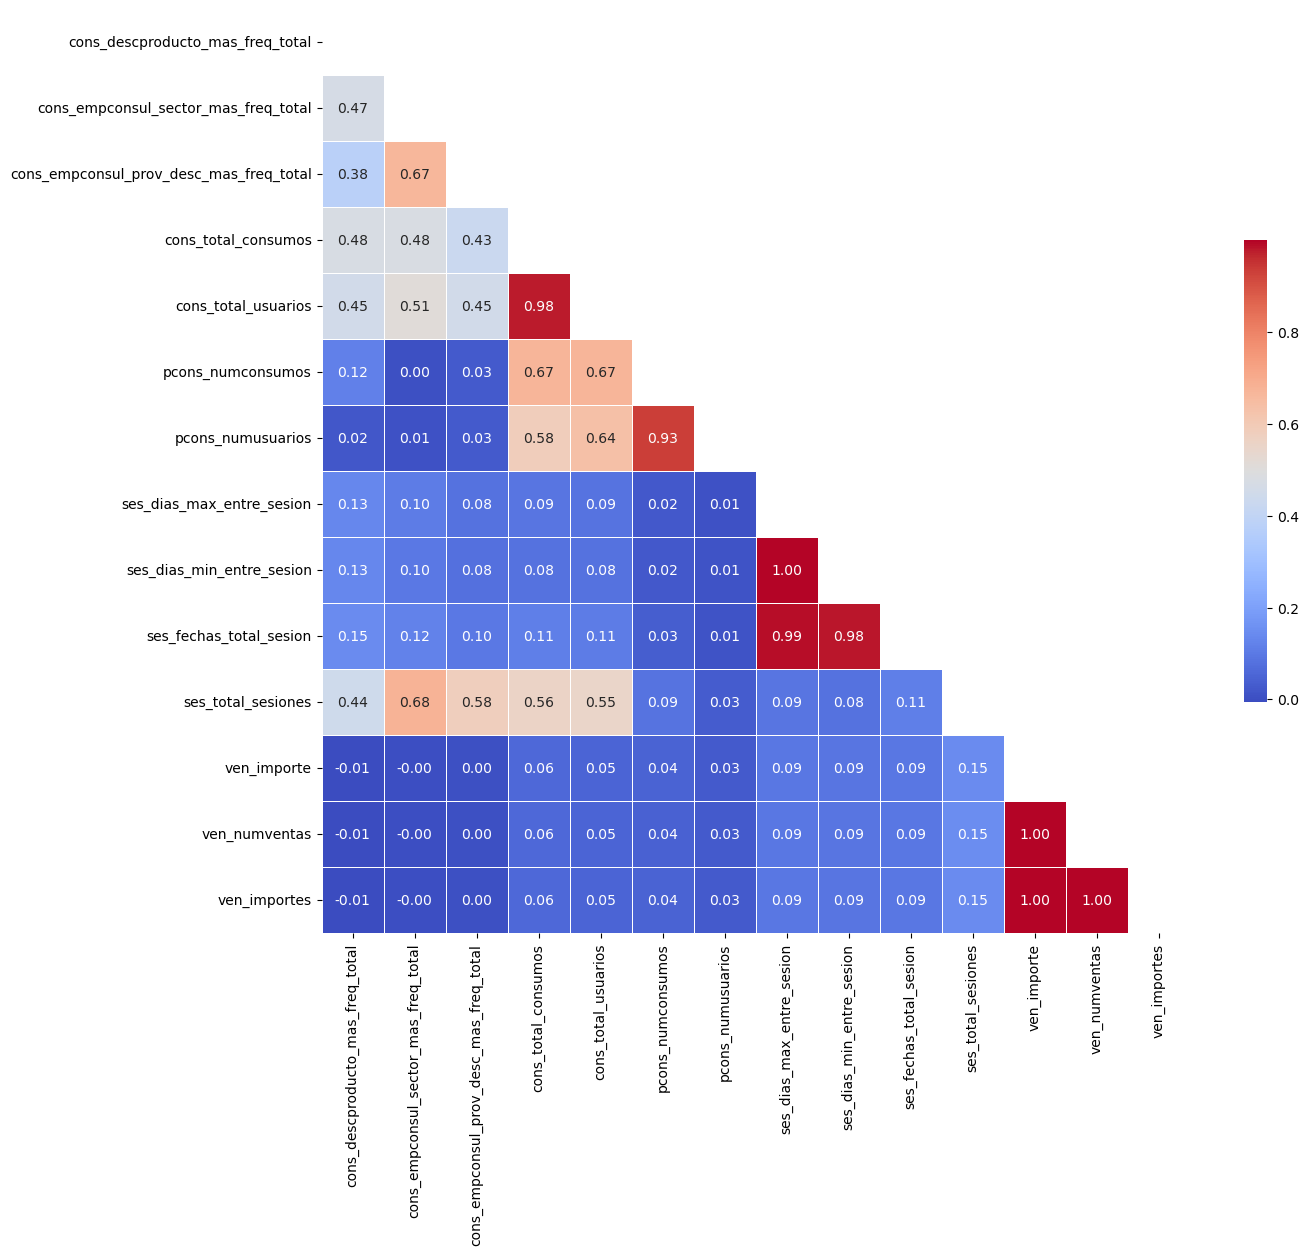

In [57]:
spearman_corr = data_set.select_dtypes(include=['int', 'float']).corr(method='spearman', numeric_only=True)

mask = np.triu(np.ones_like(spearman_corr, dtype=bool))
plt.figure(figsize=(14, 12))

sns.heatmap(spearman_corr, mask=mask, annot=True, fmt=".2f", cmap='coolwarm',
            xticklabels=spearman_corr.columns, yticklabels=spearman_corr.columns,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.show()

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> 
    
En primer lugar, se aprecia que la correlación entre <strong>cons_total_usuarios</strong> y <strong>pcons_numusuarios es de 0.93</strong>, y están fuertemente relacionadas. Este es un aspecto interesante,  que indica que a mayor cantidad de usuarios que realizan consumos promocionales, mayor es el número de usuarios que realizan un primer consumo. También se aprecia que la correlación entre <strong>cons_total_usuarios y cons_total_consumos es de 0.98</strong>. Esto tiene sentido dado que a mayor cantidad de usuarios que realizaron un consumo promocional, mayor será el consumo total. 
De igual manera, se observa que la correlación entre <strong>días_max_entre_sesion, días_min_entre_sesion y ses_fechas_total_sesiones, es aproximadamente 1</strong>. Este comportamiento tiene sentido, dado que a mayor numero de fechas diferentes donde se realiza una sesión, la cantidad de días ya sea máximo o mínimo entre sesión será mayor. 
También, se aprecia una correlación moderada entre <strong>ses_total_sesiones y los atributos cons_descproducto_mas_freq_total, cons_empconsul_sector_mas_freq_total, cons_empconsul_prov_desc_mas_freq_total, cons_total_consumos y cons_total_usuarios</strong>. Esto podría indicar que entre más frecuente sean las sesiones abiertas por un usuario, mayores serán los consumos promociones realizados. 
En relación con los atributos <strong>ven_importes, ven_numventas y ven_importe, su correlación es 1</strong>. Esto tiene sentido dado que estos atributos, estas relacionado con la cantidad de productos adquiridos por usuario que se convirtió en cliente.  

</div>

### 2.3.2. Análisis componentes principales

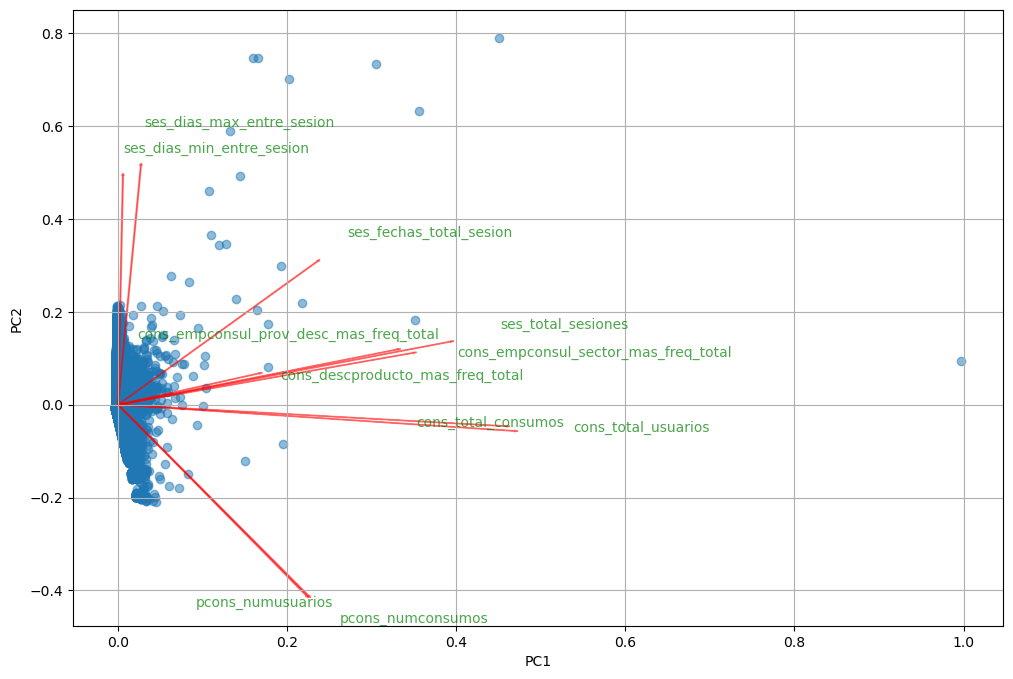

In [58]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from adjustText import adjust_text

scaler = StandardScaler()
data_set_scaled = scaler.fit_transform(data_set.select_dtypes(include=['int', 'float']).drop(['ven_importe', 'ven_numventas', 'ven_importes'], axis=1))

pca = PCA(n_components=2)

data_set_pca = pca.fit_transform(data_set_scaled)

pca_df = pd.DataFrame(data = data_set_pca, columns = ['Principal Component 1', 'Principal Component 2'])
pca_df['Target'] = data_set['usu_ind_cliente'].reset_index(drop=True)

def biplot(score, coeff, labels=None, labelsize=10):
    """
    Crea un gráfico biplot para visualizar los resultados del Análisis de Componentes Principales (PCA).

    Parámetros:
    - score (numpy.ndarray): Matriz de puntuación de PCA que contiene las coordenadas de los puntos de datos en las dos primeras componentes principales.
    - coeff (numpy.ndarray): Matriz de coeficientes de PCA que contiene las direcciones y magnitudes de las cargas de las variables originales en las dos primeras componentes principales.
    - labels (list, opcional): Etiquetas para las variables originales. Si se proporciona, se mostrarán junto a las flechas que representan las variables en el gráfico.
    - labelsize (int, opcional): Tamaño de fuente de las etiquetas.

    Salida:
    - Gráfico biplot que muestra los puntos de datos proyectados en las dos primeras componentes principales y las flechas que representan las variables originales.
    """
    xs = score[:,0]
    ys = score[:,1]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, alpha=0.5)
    plt.figure(figsize=(12, 8))
    texts = []
    for i in range(len(coeff)):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is not None:
            text = plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, labels[i], color='g', ha='center', va='center', size=labelsize, alpha=0.7)
            texts.append(text)

    plt.xlabel("PC{}".format(1), fontsize=labelsize)
    plt.ylabel("PC{}".format(2), fontsize=labelsize)
    plt.grid()
    
    adjust_text(texts, expand_points=(0, 0.5))
    plt.show()
    
features = data_set.select_dtypes(include=['int', 'float']).drop(['ven_importe', 'ven_numventas', 'ven_importes'], axis=1).columns

biplot(data_set_pca[:,0:2], np.transpose(pca.components_[0:2, :]), labels=features)

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> 
    
El gráfico muestra un biplot es una representación de las componentes principales (PCA), que permite un análisis de clúster donde las variables/predictores se visualizan como vectores (líneas rojas) y las observaciones (variable a predecir) como puntos azules. 
Los puntos azules representan a usuarios individuales, y su ubicación en el gráfico refleja su comportamiento con respecto a las dos primeras componentes principales o dimensiones del análisis de clúster.
Las líneas rojas representan la relación de las variables con estas dos componentes. La dirección de la línea indica la dirección de máxima varianza para esa variable, y su longitud sugiere la fuerza de la correlación con las componentes.

Con base en lo anterior, se plantean las siguientes interpretaciones:
    
- <strong>Cons_total_consumos y cons_total_usuarios</strong> están apuntando en la misma dirección en el espacio de las componentes, lo que sugiere que estas dos variables podrían estar correlacionadas. Esto tiene sentido, ya que esperaríamos que un mayor número de usuarios conduzca a un mayor número de consumos promocionales.

- <strong>Pcons_numconsumos y pcons_numusuarios</strong> también apuntan en la misma dirección, lo que implica que el número de primeros consumos está relacionado con el número de usuarios que realizan esos primeros consumos.

- Las variables relacionadas con las sesiones web, como <strong>ses_dias_max_entre_sesion, ses_dias_min_entre_sesion, ses_fechas_total_sesion, y ses_total_sesiones</strong>, parecen estar menos correlacionadas con las dos primeras componentes principales que las variables de consumos promocionales. Esto puede indicar que el comportamiento de la sesión web es menos distintivo en la separación de los usuarios que se convierten en clientes frente a los que no.

- Los puntos azules que están más cerca del origen (donde las líneas de las variables se cruzan) podrían representar a usuarios con menos actividad o aquellos cuyos comportamientos no están fuertemente asociados con ninguna de las variables medidas.

- Los puntos azules que están más alejados del origen y cerca de ciertas variables podrían ser usuarios cuyas acciones están fuertemente influenciadas por esas variables. Por ejemplo, si hay puntos azules cerca de cons_total_consumos, esos podrían ser usuarios que se han convertido en clientes y tienen un alto número de consumos promocionales.
</div> 

### 2.3.3. Análisis clusterización

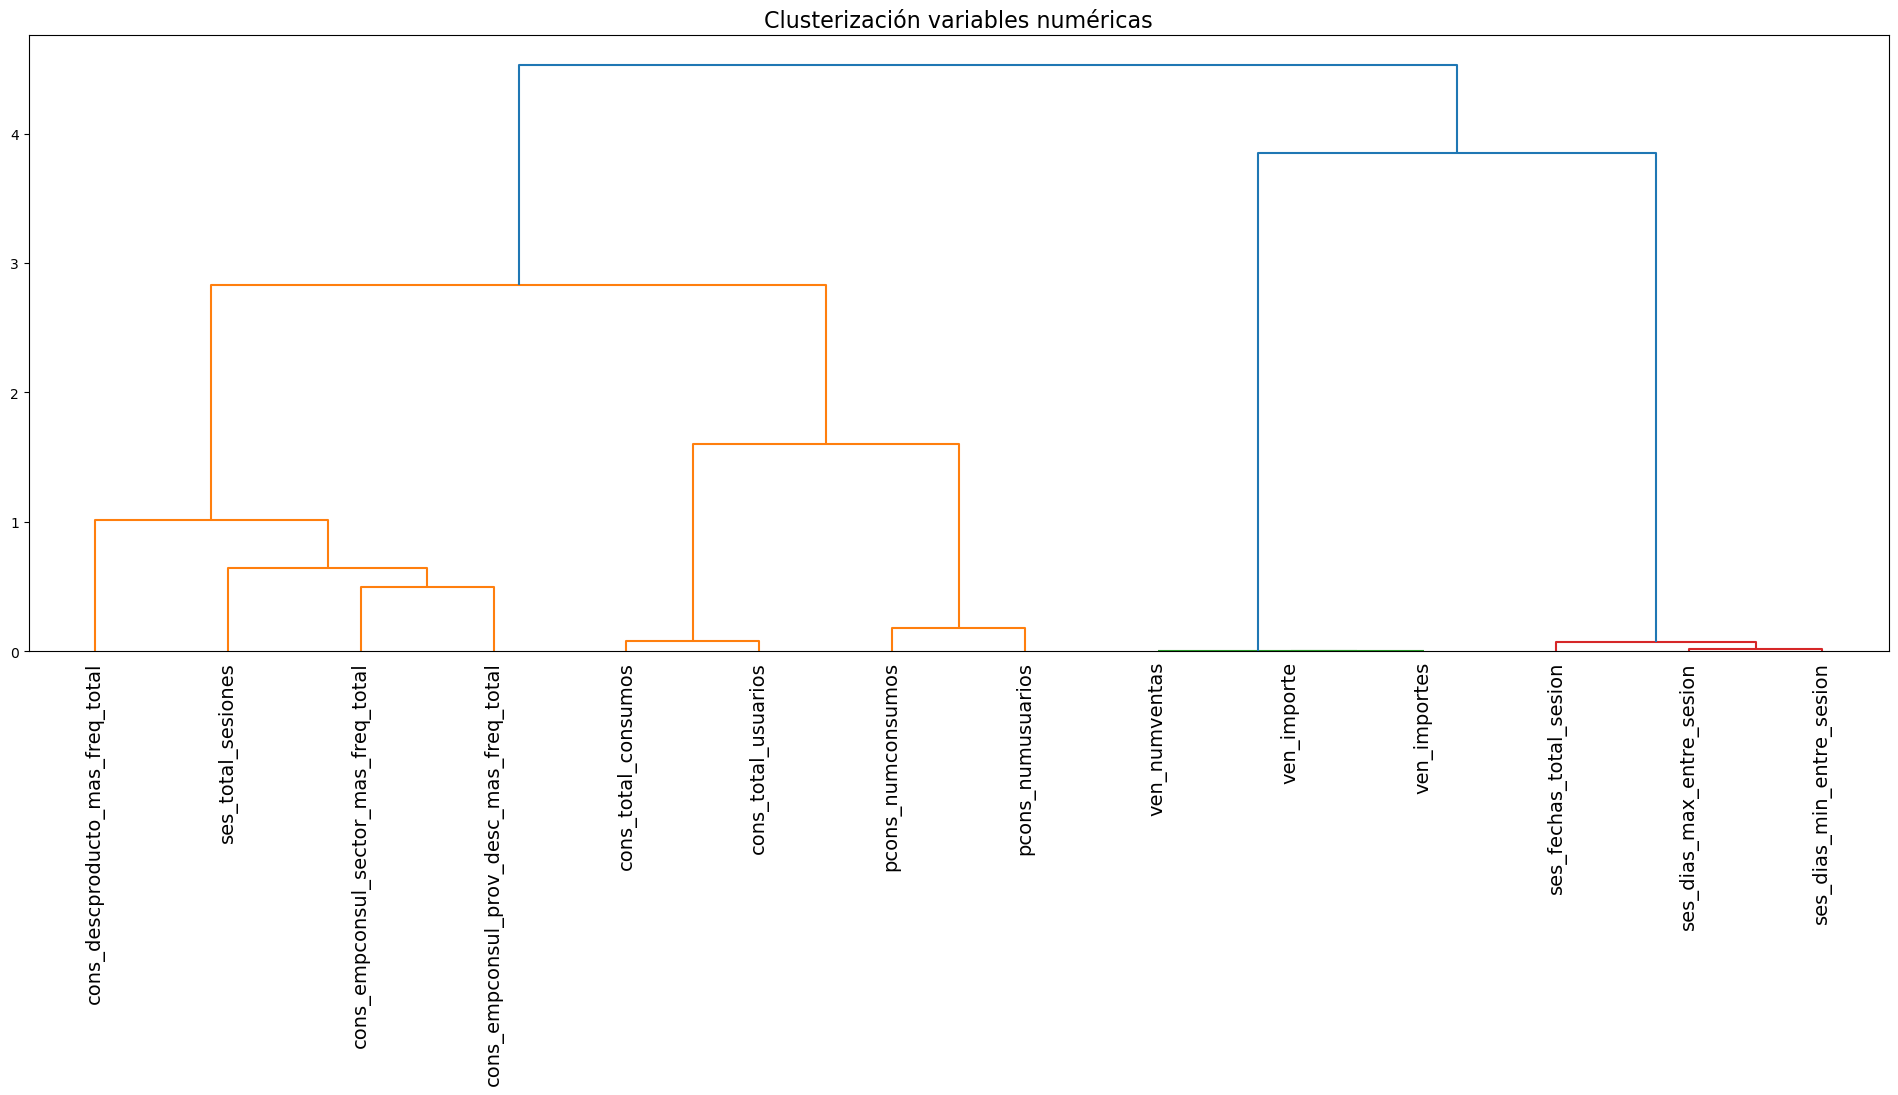

In [59]:
from scipy.cluster.hierarchy import dendrogram, linkage

X = data_set.select_dtypes(include=['int', 'float']).corr(method='spearman')
Z = linkage(X, 'ward')
fig = plt.figure(figsize=(24, 8))
dn = dendrogram(Z, labels=X.columns)
_ = plt.title("Clusterización variables numéricas", fontsize=16)
_ = plt.xticks(rotation=90, fontsize=14) 

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> 


El en gráfico anterior se observa un dendrograma, que es un tipo de diagrama que muestra las agrupaciones de variables o elementos basadas en un nivel de similitud o distancia. A continuación, se realiza un análisis e interpretación del gráfico.
    
<strong>1. Agrupaciones de variables:</strong>
El dendrograma muestra que algunas variables están agrupadas juntas, lo que sugiere que tienen patrones similares o están correlacionadas. Por ejemplo, cons_descproducto_mas_freq_total, ses_total_sesiones, y cons_empconsul_sector_mas_freq_total están juntas en un grupo, lo que podría indicar que el consumo frecuente de ciertos productos y la frecuencia de sesiones están relacionados con sectores empresariales específicos.
    
<strong>2.	Distancia entre clústeres:</strong>
La longitud de las ramas (líneas verticales) en el dendrograma indica la distancia o disimilitud entre las variables. Las ramas más largas indican una mayor diferencia. Por ejemplo, ven_importe, ven_numventas, y ven_importes están muy distantes del resto de las variables, lo que puede indicar que estas variables relacionadas con las ventas tienen un patrón distinto en comparación con las variables de comportamiento de usuario y consumo promocional.
    
<strong>3.	Relaciones entre comportamiento del usuario y ventas:</strong>
Las variables que están más relacionadas con las ventas (ven_importe, ven_numventas, ven_importes) están agrupadas por separado de las variables de comportamiento del usuario, lo que podría sugerir que las ventas están influenciadas por factores distintos de los comportamientos de usuario comunes capturados por las otras variables.
    
<strong>4.	Variables relacionadas con el tiempo de sesión:</strong>
Las variables ses_dias_max_entre_sesion y ses_dias_min_entre_sesion están agrupadas juntas, lo que es lógico ya que ambas describen aspectos del tiempo entre sesiones. Su cercanía a ses_fechas_total_sesion y ses_total_sesiones indica que estos aspectos temporales de las sesiones están fuertemente relacionados.

<strong>5.	Variables de consumo promocional:</strong>
cons_total_consumos y cons_total_usuarios están agrupados juntos, lo que podría sugerir que los consumos promocionales y la cantidad de usuarios que participan en ellos están muy relacionados.
Las variables ven_importe, ven_numventas, ven_importes, están estrechamente relacionadas con la variable objetivo y por ende entender cómo otras variables  se agrupan y se relacionan respecto a estas, permitían generar hipótesis sobre qué variables pueden ser importantes para predecir la conversión de usuarios en clientes. 
    
<strong>6.	Relación entre variables y conversión de usuarios: </strong>
Las variables de los clústeres asociados al número de sesiones, y primeros consumos, estarían más cerca de las variables del clúster ventas, lo que podría sugerir que el comportamiento de los usuarios descrito por dichas variables, sería un factor relevante en la tasa de conversión de usuarios a clientes.

</div> 

## 2.4. Correlación variables numéricas y variable objetivo

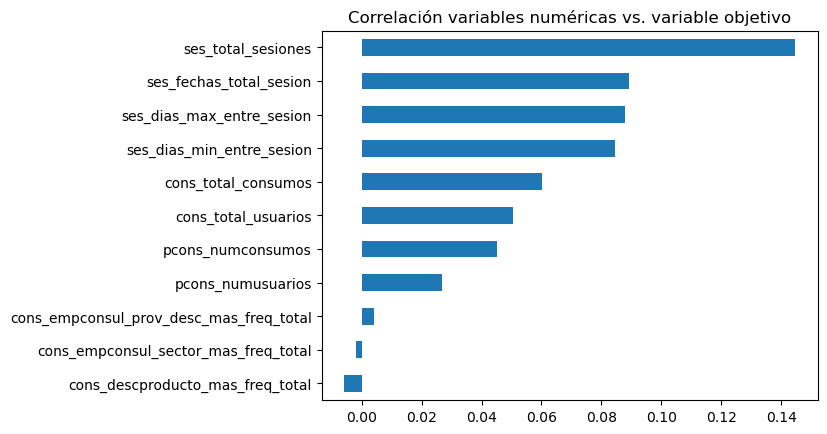

In [60]:
corr_feat_target = data_set.select_dtypes(
    include=['int', 'float']).drop(['ven_importe', 'ven_numventas', 'ven_importes'], axis=1).corrwith(
    data_set['usu_ind_cliente'].astype('int'), method='spearman'
)

corr_feat_target = pd.DataFrame(corr_feat_target, columns=['corr'])
corr_feat_target = corr_feat_target.sort_values(by='corr', ascending=True)
corr_feat_target.plot(kind='barh', legend=False)
_ = plt.title("Correlación variables numéricas vs. variable objetivo")

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> 

El grafico anterior muestra la correlación de las variables numéricas con la variable objetivo. A partir de este gráfico se puede hacer una primera aproximación para identificar las variables que se correlacionan ya sea positiva o negativamente con la variable objetivo y que pueden contribuir en la conversión de usuarios a clientes. A continuación, se presenta una interpretación general.

- En primer lugar, se aprecian correlaciones bajas, entre las variables numéricas y la variable objetivo, ya que todas son cercanas a cero. Esto sugiere que ninguna de las variables, por sí sola, tiene una fuerte relación lineal con la probabilidad de que un usuario registrado se convierta en un cliente con suscripción.
    
- Las variables asociadas a las sesiones web realizadas por el usuario, tal como como <strong>ses_total_sesiones, ses_fechas_total_sesion, ses_dias_max_entre_sesion y ses_dias_min_entre_sesion</strong> tienen algunas de las correlaciones más altas, aunque siguen siendo bajas. Esto podría indicar que hay una relación débil entre el comportamiento del usuario en el sitio web (como la frecuencia y la regularidad de las sesiones) y la conversión.

- Las variables asociadas a consumo promocional, como <strong>cons_total_consumos y cons_total_usuarios, también muestran correlaciones bajas.</strong> Sin embargo, dado que tienen las correlaciones más altas entre las mostradas, podrían aportar cierto poder prodectivo si utilizan junto a otras variables.

- La variables <strong>pcons_numconsumos y pcons_numusuarios</strong> que representan el número total de primeros consumos y el número de usuarios que los hacen, respectivamente, tienen correlaciones bajas. Sin embargo, dado que se relacionan con la adquisición de nuevos clientes, podrían ser importantes desde una perspectiva estratégica, es decir, generación de campañas de marketing dirigidas a nuevos usuarios y se puedan incluir en otros análisis tal como segmentación/clusterización. 
    
- Las variables <strong>cons_empconsul_sector_mas_freq_total, cons_empconsul_prov_desc_mas_freq_total, y cons_descproducto_mas_freq_total</strong> tienen las correlaciones más bajas en el gráfico. Esto podría sugerir que las características del producto más consumido y las características geográficas de las empresas consumidoras tienen poco impacto en la conversión de usuarios a clientes suscritos, al menos de una manera lineal.    
</div> 

## 2.5. Codificación variables categóricas 

Con el objetivo de aplicar el análisis entre las variables categóricas y la variable objetivo, usando las funciones de sckit-learn, es necesario aplicar una transformación. Para este caso se aplica una encodificación ordinal. Se opta por esta alternativa, para evitar un aumento en la dimensionalidad. Es de resaltar que la mayoría de las variables contiene un numero considerable de clases, y técnicas como one-hot, pueden aumentar considerablemente la dimensionalidad, lo cual se debe evitar para mitigar problemas en etapas posteriores, tal como sobreajuste o un aumentar la complejidad y costo computacional al entrenar y validar los modelos.

In [61]:
data_set.drop('pcons_empconsul_descsector', axis=1, inplace=True)

In [62]:
data_set.select_dtypes(include=['object']).describe(include='all').fillna(0).T

,count,unique,top,freq
cons_descproducto_mas_freq,142736,2,Ficha Básica,77703
cons_empconsul_sector_mas_freq,142736,22,G,36795
cons_empconsul_prov_desc_mas_freq,142736,34,Bogota,60703
pcons_descproducto,142736,2,Perfil Promocional,103082
pcons_empconsul_sector,142736,22,G,33592
pcons_empconsul_prov_desc,142736,34,Bogota,57099
usu_tipousuario,142736,3,PF,102160
usu_canal_registro,142736.0,8.0,3.0,41746.0
usu_ind_cliente,142736,2,0,140121
usu_bondad_email,142736,6,20,99024


In [63]:
cols_cat = data_set.select_dtypes(include=['object']).describe(include='all').columns

In [64]:
def encode_cols(data, col_name):
    """
    Codifica las categorías únicas de una columna dada en un DataFrame.

    Parámetros:
    - data (pandas.DataFrame): El DataFrame que contiene la columna a codificar.
    - col_name (str): El nombre de la columna que se desea codificar.

    Salida:
    - Un diccionario que mapea las categorías únicas a valores numéricos.
    """
    cat_name = data_set[col_name].unique()
    return dict(zip(cat_name, range(len(cat_name))))

In [65]:
data_set['cons_descproducto_mas_freq'] = data_set['cons_descproducto_mas_freq'].replace(encode_cols(data_set, 'cons_descproducto_mas_freq'))
data_set['cons_empconsul_sector_mas_freq'] = data_set['cons_empconsul_sector_mas_freq'].replace(encode_cols(data_set, 'cons_empconsul_sector_mas_freq'))
data_set['cons_empconsul_prov_desc_mas_freq'] = data_set['cons_empconsul_prov_desc_mas_freq'].replace(encode_cols(data_set, 'cons_empconsul_prov_desc_mas_freq'))
data_set['pcons_descproducto'] = data_set['pcons_descproducto'].replace(encode_cols(data_set, 'pcons_descproducto'))
data_set['pcons_empconsul_sector'] = data_set['pcons_empconsul_sector'].replace(encode_cols(data_set, 'pcons_empconsul_sector'))
data_set['pcons_empconsul_prov_desc'] = data_set['pcons_empconsul_prov_desc'].replace(encode_cols(data_set, 'pcons_empconsul_prov_desc'))
data_set['usu_tipousuario'] = data_set['usu_tipousuario'].replace(encode_cols(data_set, 'usu_tipousuario'))
data_set['usu_canal_registro'] = data_set['usu_canal_registro'].replace(encode_cols(data_set, 'usu_canal_registro'))
data_set['usu_ind_cliente'] = data_set['usu_ind_cliente'].replace(encode_cols(data_set, 'usu_ind_cliente'))
data_set['usu_bondad_email'] = data_set['usu_bondad_email'].replace(encode_cols(data_set, 'usu_bondad_email'))
data_set['ven_tipoventa'] = data_set['ven_tipoventa'].replace(encode_cols(data_set, 'ven_tipoventa'))

## 2.6. Análisis Información mutua entre variables categóricas y variable target

In [66]:
from sklearn.feature_selection import mutual_info_classif

X = data_set.loc[:, cols_cat]
X = X.drop(['usu_ind_cliente', 'ven_tipoventa'], axis=1)
y = data_set['usu_ind_cliente'].astype('int')

mi = mutual_info_classif(X, y, random_state=42)
mi = pd.Series(mi, index=X.columns)

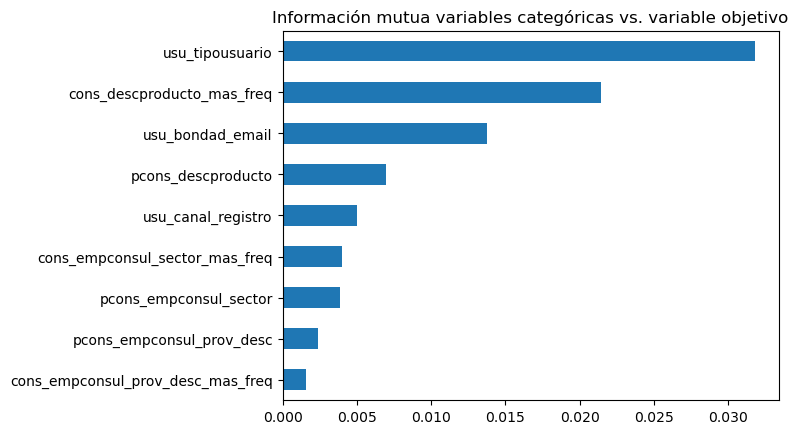

In [67]:
mi = pd.DataFrame(mi, columns=['mi'])
mi = mi.sort_values(by='mi', ascending=True)
mi.plot(kind='barh', legend=False)
_ = plt.title("Información mutua variables categóricas vs. variable objetivo")

<div class="alert alert-block alert-info">
    <strong>Observaciones:</strong> 

El grafico anterior muestra las puntuaciones de la información mutua entre las variables categóricas y la variable objetivo. En términos generales, la información mutua (MI) es una medida estadística que cuantifica la cantidad de información que una variable aleatoria contiene sobre otra. En el contexto del aprendizaje automático, se utiliza para evaluar la relevancia de las variables predictoras con respecto a la variable objetivo. Un valor más alto de información mutua indica una mayor relevancia de la característica para predecir la variable objetivo.
Con base en lo expuesto anteriormente se presenta un análisis general del gráfico.
    
<strong>1. Variables asociadas a usuario:</strong>
    
<strong>- usu_tipousuario:</strong> Esta variable, que identifica el tipo de usuario, parece tener la puntuación de MI más alta entre las presentadas, lo que sugiere que el tipo de usuario es relativamente informativo para predecir la conversión.

<strong>- usu_bondad_email:</strong> La calidad o la bondad del email, posiblemente derivada de campañas de email marketing, también tiene una puntuación de MI relativamente alta, indicando que es un buen predictor de la conversión.
    
<strong>- usu_canal_registro:</strong> El canal a través del cual el usuario se registró también tiene una relación con la variable objetivo, aunque su puntuación de MI es más baja.
    
<strong>2. Variables de descripción del producto:</strong>

<strong>- cons_descproducto_mas_freq:</strong> El producto más frecuente sobre el que se han realizado consumos promocionales tiene una puntuación de MI más baja que las variables de usuario, lo que indica una relación más débil con la conversión.
    
<strong>- pcons_descproducto:</strong> Similar a la anterior, pero relacionada con los primeros consumos. Su información mutua es baja, lo que sugiere una influencia limitada en la variable objetivo.
<strong>- Las variables cons_empconsul_sector_mas_freq, cons_empconsul_prov_desc_mas_freq y pcons_empconsul_prov_desc</strong> tienen las puntuaciones de MI más bajas, lo que sugiere que estos atributos geográficos y sectoriales son menos predictivos de la conversión.

<strong>3. Contexto del problema de e-commerce:</strong>

Dado que el objetivo es predecir qué usuarios registrados se convertirán en clientes, las variables de usuario parecen ser más directamente relacionadas con este comportamiento. Esto podría reflejar que las características demográficas o relacionadas con la interacción del usuario son más críticas para entender la conversión que los detalles específicos de los productos consumidos o la geografía de las empresas consultoras.

</div> 

# 3. Creación dataframe de estudio

In [24]:
data_set.drop(['ven_tipoventa', 'ven_importe', 'ven_numventas', 'ven_importes'], axis=1, inplace=True)

In [21]:
data_set = data_set.select_dtypes(include=['int', 'float'])

In [22]:
data_set.shape[0]*data_set.shape[1]

2997456

In [23]:
data_type = pd.DataFrame(data_set.dtypes, columns=['tipo dato'])
data_type['count'] = 1
data_type.groupby('tipo dato').count()

,count
tipo dato,
int32,4
int64,9
float64,8


In [78]:
data_set.to_pickle('data//data_set_2.pkl')

# 4. Conlusiones 

<div class="alert alert-block alert-info">
    
En las secciones anteriores se desarrolló la segunda fase del componente experimental del TFM. 
Se hizo el preprocesamiento del dataset de estudio, donde se aplicó dos técnicas de imputación de valores nulos. La primera basada en random forest para variables numéricas y la segunda basada en la moda, para variables categóricas. El porcentaje de valores nulos de las variables donde se aplicó las técnicas de imputación fue relativamente bajo (menos al 1%).

También se realizó un análisis exploratorio de datos tanto univariado como multivariado aplicando diversas técnicas de la estadística descriptiva y de aprendizaje automático, como correlación, clusterización y análisis de componentes principales. Respecto al análisis de correlación se determinó que variables como cons_total_usuarios" y "pcons_numusuarios" están fuertemente relacionadas, lo que sugiere que a mayor cantidad de usuarios que realizan consumos promocionales, mayor es el número de usuarios que realizan un primer consumo. Un valor fuerte de correlación también se presentó entre cons_total_usuarios y cons_total_consumos, indicando que a cantidad de usuarios que realizaron un consumo promocional, mayor será el consumo total. En términos generales la correlación entre las variables en mayor proporción es baja y moderada, salvo las variables mencionadas anteriormente.
    
Se realizó un análisis de componentes principales y un gráfico biplot donde se determinó que las variables cons_total_consumos, cons_total_usuarios, pcons_numconsumos tienen una gran correlación y apuntan fuertemente hacia la componente principal 1. De estas variables, cons_total_consumos tiende a ubicarse donde hay mayor densidad de puntos azules, lo que podría indicar que el comportamiento asociado a esta variable podría influenciar a la conversión de usuarios a clientes. Respecto al gráfico de clusterización basado en dendograma, se observa que las variables asociadas a sesiones web y consumos promocionales están más cerca a las variables tipo venta. Lo que podría sugerir que el comportamiento de los usuarios descrito por dichas variables sería un factor relevante en la tasa de conversión de usuarios a clientes.

En el análisis de correlación con la variable objetivo se observa una correlación débil, indicando que ninguna variable numérica tiene un comportamiento lineal y definido respecto a la variable objetivo. No obstante, las variables que tiene una correlación significativamente están asociadas a las sesiones web y consumos promocionales. 
    
Respecto los valores de información mutua entre las variables categóricas y la variable objetivo, se observa que las variables asociadas a la descripción del producto más frecuente consumido y bondad_email tienen los valores más altos. Por el contrario, las variables asociadas al sector geográfico al que pertenece la empresa tienen un valor bajo. Desde esta perspectiva, la información que ofrecen estas variables puede no aportar poder predictivo en las fases posteriores de entrenamiento y validación de modelos. 
    
Finalmente se creó el dataset final de estudio, sobre el que se aplicarán los diferentes modelos. Está constituido por 11 variables numéricas y 8 categóricas, como variables predictoras y una variable categórica como variable objetivo.
</div> 

# Información de sesión

In [44]:
import session_info
session_info.show()